#### Loading the libraries

In [88]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#### Load the data

We are going to load the cleaned csv file from our previous step

In [89]:
df_or = pd.read_csv('../data/processed/onlineRetail_Cleaned.csv')

In [90]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824293 entries, 0 to 824292
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824293 non-null  object 
 1   StockCode    824293 non-null  object 
 2   Description  824293 non-null  object 
 3   Quantity     824293 non-null  int64  
 4   Price        824293 non-null  float64
 5   Customer ID  824293 non-null  float64
 6   Country      824293 non-null  object 
 7   Day_of_week  824293 non-null  object 
 8   Date         824293 non-null  object 
 9   Hour         824293 non-null  int64  
 10  Month        824293 non-null  int64  
 11  Year         824293 non-null  int64  
 12  Day          824293 non-null  int64  
 13  Weeknumber   824293 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 88.0+ MB


In [91]:
df_or.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49


In [136]:
#Updating the column name for the customer and assigning an appropriate data type
df_or.rename(columns={'Customer ID':'Customer_Id'},inplace = True)
df_or.Customer_Id =  df_or.Customer_Id.astype(int)

Finding total number of distinct products on sale

In [99]:
unique_Df = df_or.groupby(by='StockCode').count()
unique_Df.shape

(4646, 13)

There are ~4646 unique products that are being sold by the online retail store.


Number of orders that have quantity less than 0. We can see that they are directly related to the order being cancelled. There are 18744 orders that have been cancelled.

In [69]:
neg_qty_df = df_or[(df_or.Quantity < 0)]
neg_qty_df.shape

(18744, 14)

In [73]:
counts = 0
for x in df_or.Invoice:
    if(x[0] == 'C'):
        counts = counts + 1
print(counts)


18744


What are the Max and min price products in the store? 

Going forward we are going to use the dataframe that is excluding the Cancelled orders

In [96]:
df_or[df_or.Quantity > 0].sort_values(by='Price',ascending=False).head()

,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
101053,502263,M,Manual,1,10953.50,12918.0,United Kingdom,Tuesday,2010-03-23,15,3,2010,23,12
284727,524159,M,Manual,1,10468.80,14063.0,United Kingdom,Monday,2010-09-27,16,9,2010,27,39
52168,496115,M,Manual,1,8985.60,17949.0,United Kingdom,Friday,2010-01-29,11,1,2010,29,4
538888,551697,POST,POSTAGE,1,8142.75,16029.0,United Kingdom,Tuesday,2011-05-03,13,5,2011,3,18
96822,501768,M,Manual,1,6958.17,15760.0,Norway,Friday,2010-03-19,11,3,2010,19,11


In [95]:
df_or[df_or['Customer_Id'] == 15098.0]

,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
576719,556442,22502,PICNIC BASKET WICKER SMALL,60,4.95,15098.0,United Kingdom,Friday,2011-06-10,15,6,2011,10,23
576720,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,649.50,15098.0,United Kingdom,Friday,2011-06-10,15,6,2011,10,23
576730,C556445,M,Manual,-1,38970.00,15098.0,United Kingdom,Friday,2011-06-10,15,6,2011,10,23
576731,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,649.50,15098.0,United Kingdom,Friday,2011-06-10,15,6,2011,10,23
576741,C556448,22502,PICNIC BASKET WICKER SMALL,-60,4.95,15098.0,United Kingdom,Friday,2011-06-10,15,6,2011,10,23


In [123]:
non_cancelled_Df = df_or[df_or.Quantity > 0]

In [141]:
non_cancelled_Df[non_cancelled_Df.Price == df_or.Price.min()]

,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
42930,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,16705.0,United Kingdom,Tuesday,2010-01-19,17,1,2010,19,3
52542,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,13583.0,United Kingdom,Friday,2010-01-29,13,1,2010,29,4
55039,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,17350.0,United Kingdom,Monday,2010-02-01,15,2,2010,1,5
56494,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,13408.0,United Kingdom,Wednesday,2010-02-03,11,2,2010,3,5
65369,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,13408.0,United Kingdom,Monday,2010-02-15,10,2,2010,15,7
70744,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,15182.0,United Kingdom,Sunday,2010-02-21,12,2,2010,21,7
74389,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,13765.0,United Kingdom,Wednesday,2010-02-24,13,2,2010,24,8
76603,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,14459.0,United Kingdom,Friday,2010-02-26,13,2,2010,26,8
91842,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,14857.0,United Kingdom,Monday,2010-03-15,11,3,2010,15,11
118846,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,12671.0,Germany,Monday,2010-04-12,16,4,2010,12,15


Finding the mean & the median cart value. 

In [124]:
average_cart = non_cancelled_Df['Price'].mean()
average_cart

3.206561485397456

In [125]:
median_cart = non_cancelled_Df['Price'].median()
median_cart

1.95

Finding the sales distribution over the weekdays, weeknumber and month

In [126]:
weekday_sales_df = non_cancelled_Df.groupby(by='Day_of_week')['Price'].sum().reset_index()
weekday_sales_df.sort_values(by='Price',ascending=True)

,Day_of_week,Price
2,Saturday,1443.260
0,Friday,361803.163
3,Sunday,391937.792
6,Wednesday,427471.673
1,Monday,433913.746
5,Tuesday,443426.702
4,Thursday,523046.062


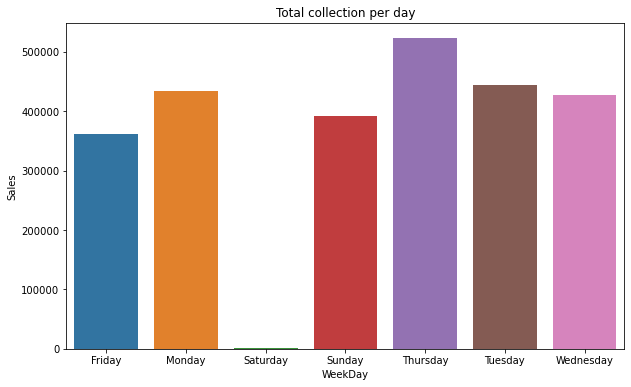

In [127]:
plt.subplots(figsize=(10, 6))
sns.barplot(x='Day_of_week',y='Price',data=weekday_sales_df)
plt.xlabel('WeekDay')
plt.ylabel('Sales')
plt.title('Total collection per day')
plt.show()

In [128]:
weekly_sales_df = non_cancelled_Df.groupby(by='Weeknumber')['Price'].sum().reset_index()
weekly_sales_df 

,Weeknumber,Price
0,1,30831.040
1,2,32837.110
2,3,34973.381
3,4,50469.051
4,5,35249.802
5,6,28040.940
6,7,35785.022
7,8,38352.072
8,9,44695.540
9,10,37001.520


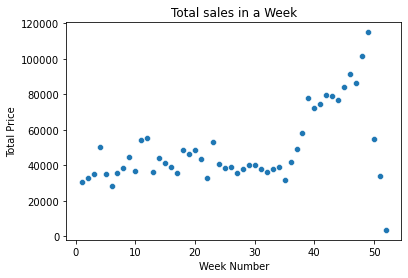

In [129]:
sns.scatterplot(x='Weeknumber',y='Price',data = weekly_sales_df)
plt.xlabel('Week Number')
plt.ylabel('Total Price')
plt.title('Total sales in a Week')
plt.show()

Finding the total number of orders placed in each week,day of the week and the month

In [130]:
month_orders = non_cancelled_Df.groupby(by='Month')['Invoice'].count().reset_index(name='Counts')
month_orders


,Month,Counts
0,1,43004
1,2,43294
2,3,59476
3,4,49877
4,5,56964
5,6,58373
6,7,53857
7,8,53399
8,9,74627
9,10,99115


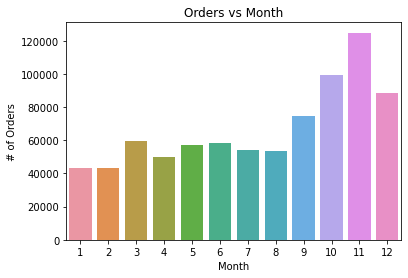

In [131]:
sns.barplot(x='Month',y='Counts',data=month_orders)
plt.xlabel('Month')
plt.ylabel('# of Orders')
plt.title('Orders vs Month')
plt.show()

In [132]:
weekday_orders = non_cancelled_Df.groupby(by='Day_of_week')['Invoice'].count().reset_index(name='Counts')
weekday_orders

,Day_of_week,Counts
0,Friday,105502
1,Monday,128359
2,Saturday,400
3,Sunday,136329
4,Thursday,161664
5,Tuesday,136794
6,Wednesday,136501


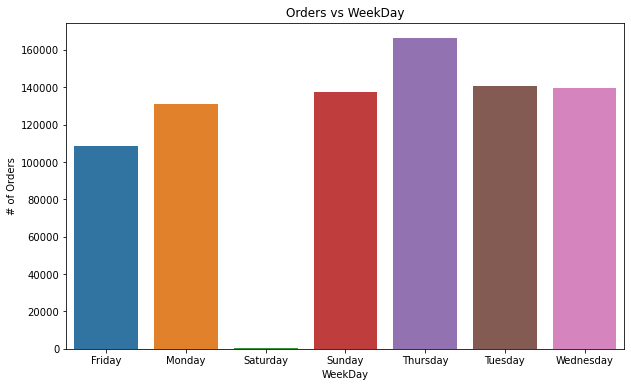

In [82]:
plt.subplots(figsize=(10, 6))
sns.barplot(x='Day_of_week',y='Counts',data=weekday_orders)
plt.xlabel('WeekDay')
plt.ylabel('# of Orders')
plt.title('Orders vs WeekDay')
plt.show()

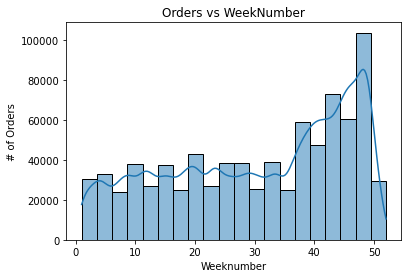

In [51]:
sns.histplot(x='WeekDay',data=df_or,kde=True,bins=20)
plt.xlabel('Weeknumber')
plt.ylabel('# of Orders')
plt.title('Orders vs WeekNumber')
plt.show()